<a href="https://colab.research.google.com/github/ashwins03/BCS_Task_Submission/blob/main/Time_series_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [23]:
path = []
p = Path('.')

for f in p.glob('*'):
    path.append(f)

In [3]:
def rename(df_):
    df_ = df_.rename({"value":"temperature"},axis=1)
    return df_

In [13]:
pathfile=Path('/content/machine_temp_failure_missing.csv')
df=pd.read_csv(pathfile)
df[df.isnull().any(axis=1)]

,timestamp,value
2054,10-12-2013 00:25,NaN
2055,10-12-2013 00:30,NaN
2056,10-12-2013 00:35,NaN
2057,10-12-2013 00:40,NaN
2058,10-12-2013 00:45,NaN
...,...,...
22685,19-02-2014 14:40,NaN
22686,19-02-2014 14:45,NaN
22687,19-02-2014 14:50,NaN
22688,19-02-2014 14:55,NaN


In [27]:
Data= df.describe()
df.rename(columns={"value": "temperature"}, inplace=True)
print(Data)

        temperature  delta_temperature
count  21410.000000       21380.000000
mean      85.968188           0.001373
std       13.553070           1.079301
min        2.084721          -4.025135
25%       83.082867          -0.744851
50%       89.251290          -0.011536
75%       93.910748           0.729413
max      108.510543          19.881322


In [28]:
df['delta_temperature'] = df['temperature'].diff().shift(-1)
print(df.tail())

              timestamp  temperature  delta_temperature
22690  19-02-2014 15:05    98.185415          -0.381246
22691  19-02-2014 15:10    97.804168          -0.668700
22692  19-02-2014 15:15    97.135468           0.921384
22693  19-02-2014 15:20    98.056852          -1.152991
22694  19-02-2014 15:25    96.903861                NaN


In [29]:
df.head()

,timestamp,temperature,delta_temperature
0,02-12-2013 21:15,73.967322,0.968560
1,02-12-2013 21:20,74.935882,1.188280
2,02-12-2013 21:25,76.124162,2.016546
3,02-12-2013 21:30,78.140707,1.189128
4,02-12-2013 21:35,79.329836,-0.619417


In [30]:
df.isnull().sum()

timestamp               0
temperature          1285
delta_temperature    1315
dtype: int64

In [31]:
df['delta_temperature'] = df['temperature'] - df['temperature'].shift(1)
df.head()

,timestamp,temperature,delta_temperature
0,02-12-2013 21:15,73.967322,NaN
1,02-12-2013 21:20,74.935882,0.968560
2,02-12-2013 21:25,76.124162,1.188280
3,02-12-2013 21:30,78.140707,2.016546
4,02-12-2013 21:35,79.329836,1.189128


In [32]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates

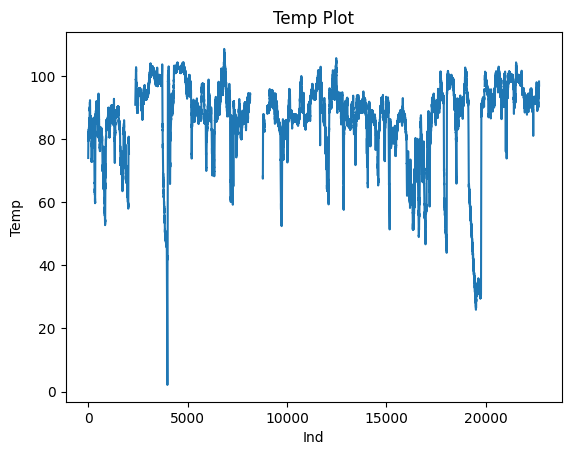

In [33]:
plt.plot(df.index, df['temperature'])
plt.xlabel('Ind')
plt.ylabel('Temp')
plt.title('Temp Plot')
plt.show()

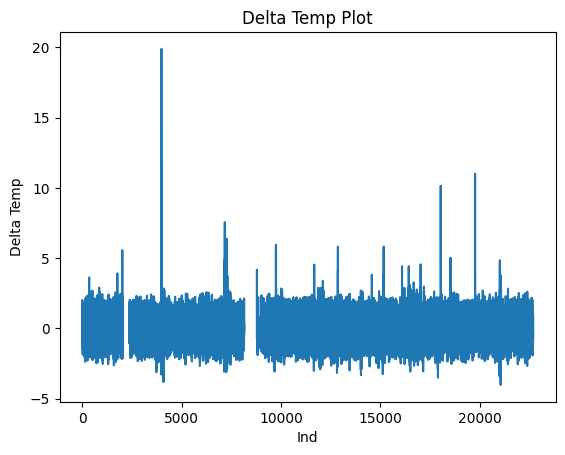

In [34]:
plt.plot(df.index, df['delta_temperature'])
plt.xlabel('Ind')
plt.ylabel('Delta Temp')
plt.title('Delta Temp Plot')
plt.show()

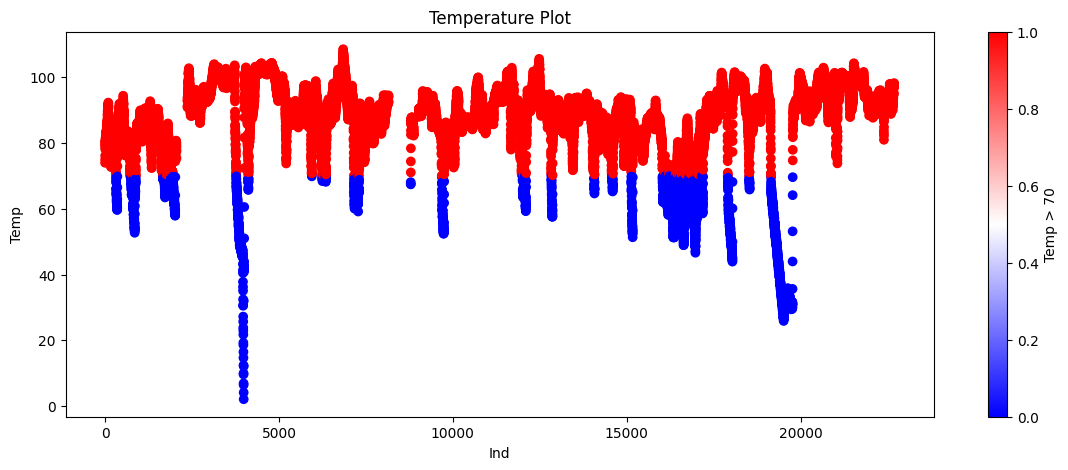

In [35]:
plt.figure(figsize=(14, 5))
plt.scatter(df.index, df['temperature'], c=df['temperature'] > 70, cmap='bwr')
plt.xlabel('Ind')
plt.ylabel('Temp')
plt.title('Temperature Plot')
plt.colorbar(label='Temp > 70')
plt.show()